# Chapter 11. scikit-learn



:::{admonition} 학습목표와 기대효과
:class: info  
- 학습목표
  - 인

- 기대효과
  - 인
:::

## Scikit-Learn(사이킷 런)
- 2007년 구글에 개발한 라이브러리로, 현재 파이썬으로 구현된 라이브러리 중에서 머신러닝 교육 및 실무용으로 가장 많이 사용되고 있는 오픈소스 라이브러리이다. 회귀, 분류, 군집 등 실무에서 적용하는 대부분의 머신러닝 모형을 제공한다. https://pypi.org/project/scikit-learn/



## 예제: 붓꽃(iris) 품종 예측하기

붓꽃 데이터는 1936년 한 영국 통계학자에 의해 선형분류 문제의 예제로 활용되면서 머신러닝의 대표적인 예제로 활용되고 있다.

붓꽃의 특징(feature)은 꽃받침 길이(sepal length), 꽃받침 폭(sepal width), 꽃잎 길이(petal length), 꽃잎 폭(petal width)으로 나눠지며ㅏ, 얻고자 하는 목표값(label)은 setosa, versicolor, verginica이다.

붓꽃 데이터에는 세 품종 각각 50개씩 총 150개의 데이터가 들어있다.

https://en.wikipedia.org/wiki/Iris_flower_data_set

<div align="center"><img src="https://haesunbyun.github.io/common/images/ai7.png"></div>

### 데이타 확인 및 파악
- 사이킷런 모듈의 이름은 sklearn이며, 붓꽃 데이터는 워낙 유명한 데이터라 sklearn의 datasets에 이미 들어가 있다.
- 먼저 이를 import 시킨다.

```
from sklearn.datasets import load_iris
iris = load_iris()
iris
```

In [ ]:
dir(iris)

In [ ]:
iris.data

In [ ]:
iris.filename

In [ ]:
iris.feature_names

In [ ]:
iris.target

In [ ]:
iris.target_names
#dtype 참조 : https://engineer-mole.tistory.com/85

In [ ]:
iris.target.shape

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
iris_data=sns.load_dataset('iris')
iris_data.head()

sns.pairplot(iris_data, hue="species", height=3)
plt.show()

### train set과 test set으로 분리
- 지도학습에서는 트레이닝 데이터 즉, 학습을 위한 특징(feature)와 결정값인 레이블(label)데이터로 모델을 학습 한 뒤, 별도의 테스트 데이터에서 미지의 레이블을 예측한다.
- 명확한 정답이 주어진 데이터를 먼저 학습하고 미지의 정답을 예측하는 방식이다.
- 그래서 붓꽃 데이터를 train_test_split()을 사용하여 트레이닝 데이터와 테스트 데이터로 나눈다.
- train_test_split()함수는 별도의 옵션을 설정하지 않으면 트레이닝:테스트의 비율을 75:25로 분리한다.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [ ]:
print(X_train.shape, X_test.shape)

In [ ]:
print(y_train.shape, y_test.shape)

In [ ]:
display(X_train[:5], y_train[:5])

### k-NN(최근접 이웃) 예측모델 적용
- 머신러닝 알고리즘으로는 k-NN 알고리즘을 적용해보자.
- k-NN알고리즘은 거리기반 분류분석 모델이다.
- 거리가 가까운 k개의 다른 데이터의 레이블을 참조하여 유사 속성에 따라 분류하는 알고리즘이다.
- k-NN을 사용해보는 이유는 붓꽃이 꽃잎의 길이, 너비, 꽃받침의 길이, 너비에 따라 품종이 유사성이 있으므로 이 값들을 기반으로 유사한 너비와 길이를 가진 값들을 동일 품종으로 예측하기 위함이다. 즉 가까운 k개의 너비와 길이를 기반으로 품종을 결정짓고자 한다.
- 거리를 측정할 때 유클리디안 거리 계산법을 사용한다.

$d(i,j) = \sqrt{(x_j-x_i)^2 + (y_j-y_i)^2}$

<div align="center"><img src="https://haesunbyun.github.io/common/images/ai8.png" ></div>

- 지난 완전실습문제로 나왔던 가장 가까운 이웃찾기가 k-NN알고리즘의 일부를 구현하는 예제이다.
- 간단한 알고리즘이지만 이미지 처리, 영상에서 글자 인식, 얼굴 인식, 선호도 예측, 유전자 패턴 인식 등 많은 분야에서 사용되고 있다.
- sklearn모듈에서 k-NN 알고리즘은 sklearn.neighbors에 KNeighborsClassifier()로 구현되어 있다.

- k-NN에서 k값은 옵션 n_neighbors로 설정가능하다. 디폴트는 5이다.
- 여기서는 아주 심플하게 k를 1로 설정한 k-NN 알고리즘으로 모델을 만들어보자.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)

- KNeighborsClassifier()뿐만 아니라 sklearn모듈에 구현되어 있는 많은 머신러닝 알고리즘들은 파라미터를 통해 알고리즘의 성능을 튜닝할 수 있다.

In [ ]:
help(KNeighborsClassifier)

- 이제 만들어진 모델에 트레이닝데이터를 입력으로 넣어서 학습하도록 시키자.
- 학습은 fit()함수를 통해서 이루어진다.
- feature로 X_train과 label(답)로 y_train을 입력으로 줘서 학습시킨다.
- 데이터가 150개뿐이라 학습은 금방 끝난다.

In [ ]:
model.fit(X_train, y_train) #data(입력값) target(출력값)을 줄테니 학습해봐

KNeighborsClassifier(n_neighbors=1)

- 학습이 완료되었으니 샘플 하나를 입력으로 줘서 예측해보도록 하자.
- 이때 샘플이 하나일지라도 2차원 배열로 줘야 한다.
- 임의값 [[6,3,4,1.5]]을 줬더니 array([1])의 값을 반환한다. 즉, 'versicolor'로 예측한다.

In [ ]:
model.predict([[6,3,4,1.5]])

- 모델이 학습을 잘했는지 테스트셋(X_test)을 입력으로 넣어보자. 이때 모델이 잘 만들어졌는지 평가하기 위해 y_test도 함께 넣어서 평가점수를 획득해보자.
- 만든 모델의 예측 정확도는 0.9736정도로 높은 평가점수가 나온다.
- 이 데이터는 원래 잘 분리된 데이터라 모델 평가 점수가 높게 나온다.

In [ ]:
score = model.score(X_test,y_test)
print(score)

- 정답을 제대로 예측했는지 하나 하나 확인해보기 위해 X_test를 predict()에 넣어준 후, 정답인 y_test와 모델이 예측한 y_pred를 확인해보자.
- 딱 하나만 예측이 빗나간것을 확인할 수 있다.

In [ ]:
y_pred = model.predict(X_test)
y_test == y_pred

In [ ]:
(y_test == y_pred).mean()

#### Problem: 선형회귀 모델
지난 수업에서는 분류모델 가운데, k-NN 알고리즘을 적용하여 붓꽃의 종류를 예측하는 모델을 만들어 보았다.

😄 선형회귀모델을 적용하여 붓꽃 꽃잎의 길이를 예측하시오.

  - 선형 회귀는 종속 변수 y와 하나 이상의 독립 변수 x와의 선형 상관관계를 모델링하는 기법이다.
  - 종속변수: 독립변수의 값에 영향을 받는 변수, 결과가 되는 칼럼
    - '온도가 30도가 되니 아이스크림 판매량이 500개를 돌파했다.'에서 아이스크림 판매량이 종속변수이다.
  - 독립변수: 종속변수에 영향을 미치는 변수, 원인이 되는 칼럼
    - '온도가 30도가 되니 아이스크림 판매량이 500개를 돌파했다.'에서 온도가 독립변수이다.


##### 데이터 확인
- 모듈 seaborn에서 제공하는 iris 데이터셋을 불러와 확인해본다.
- sns.load_dataset()으로 불러오면 pandas의 DataFrame 구조로 읽어온다.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris_data=sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<div align="center"><img src="https://haesunbyun.github.io/common/images/ai7.png"></div>

- 선형 회귀는 종속 변수 y와 하나 이상의 독립 변수 x가 필요하므로 종속변수와 독립변수를 결정해보자.
- columns의 인덱스 0(임의로 선택)을 종속변수로 지정하고, 인덱스 1~3을 독립변수로 지정해보자.

In [ ]:
cols = list(iris_data.columns)
print(cols)
y_col = cols[0]
x_cols = cols[1:4]
print(x_cols, y_col)

['sepal_width', 'petal_length', 'petal_width'] sepal_length


- train_test_split()을 사용하여 트레이닝 데이터와 테스트 데이터로 나눈다.
- 옵션 test_size = 0.3로 줘서 트레이닝:테스트의 비율을 70:30으로 분리해보자.

In [ ]:
from sklearn.model_selection import train_test_split
iris_df = iris_data[cols[:4]] # 분석에 불필요한 5번째 칼럼 species 제외한 데이터
iris_train, iris_test = train_test_split(iris_df, test_size = 0.3)

- 학습용인 iris_train 데이터의 모양을 확인해보자.

In [ ]:
iris_train.shape

(105, 4)

- 검증용인 iris_test 데이터의 모양을 확인해보자.

In [ ]:
iris_test.shape

(45, 4)

##### 모델 생성
- 데이터를 분리했으니 선형회귀모델을 생성해보자.
- 선형회귀모델은 sklearn.linear_model의 LinearRegression()을 이용하여 생성할 수 있다.
- LinearRegression()에 들어갈 옵션은 default로 두고 model을 만들어보자.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

- 독립변수 X와 종속변수 y를 전달하여 학습을 시키자.

In [ ]:
model.fit(X = iris_train[x_cols], y = iris_train[y_col])

LinearRegression()

- 변수 coef_를 이용하여 기울기를 확인할 수 있다.
- 세 개의 독립변수에 대한 기울기는 [ 0.61809913,  0.72706308, -0.59775925]와 같다.

In [ ]:
model.coef_        # 기울기

array([ 0.61809913,  0.72706308, -0.59775925])

- 변수 intercept_를 이용하여 절편을 확인할 수 있다.


In [ ]:
model.intercept_  # 절편

1.9124812422500796

- 기울기를 a, 절편을 b로 두었을 때 회귀방정식은 aX+b이다.

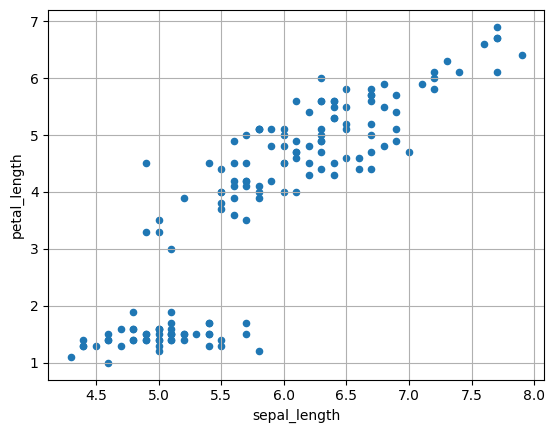

In [ ]:
#plt.plot(x_cols, y_col)

iris_data.plot(kind ="scatter", x ='sepal_length', y ='petal_length')
plt.grid()
plt.show()

- 만든 회귀모델에 테스트데이타를 주고 sepal_length를 예측해보도록 하자.

In [ ]:
y_pred = model.predict(X=iris_test[x_cols])
y_pred

array([7.15575091, 4.92317178, 5.4789581 , 6.88329373, 6.67462264,
       6.45739138, 5.60320004, 6.40458953, 6.19837992, 6.77799208,
       4.85286999, 6.17838109, 5.74160676, 6.0337233 , 6.30368157,
       4.80885552, 5.18464472, 6.43962681, 6.46178507, 6.40023325,
       5.07832194, 6.70765288, 6.84609702, 5.21528831, 6.20277361,
       4.49484536, 6.73394019, 5.00222353, 6.78893889, 5.14063025,
       6.56708672, 5.51759517, 4.93192174, 5.07688159, 5.46119353,
       6.02277649, 5.73065995, 4.87915731, 6.09936675, 4.71885696,
       5.59005638, 6.4311789 , 4.03561072, 7.30946072, 7.99024547])

In [ ]:
len(y_pred) # 45

45

- 오리지널 데이터와 정답을 줘서 모델의 평가점수를 확인해보자.

In [ ]:
score = model.score(iris_test[x_cols], iris_test[y_col])

In [ ]:
score

0.858607659266148

#### Problem: 군집(clustering) 모델
😄 군집모델 가운데 k-means 알고리즘을 적용하여 붓꽃의 품종을 예측하시오.
- 군집은 비지도 학습에 포함된다.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3)

In [ ]:
kmeans.fit(iris_df) #학습시킴

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
kmeans.labels_

In [ ]:
len(kmeans.labels_)

150

In [ ]:
iris_df['target'] = iris_data.species
iris_df['cluster'] = kmeans.labels_

In [ ]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [ ]:
iris_result = iris_df.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target      cluster
setosa      1          50
versicolor  0          48
            2           2
virginica   0          14
            2          36
Name: sepal_length, dtype: int64


## 마무리

- 머신러닝을 지원하는 모듈인 scikit-learn에 구현되어 있는 지도학습 알고리즘 가운데 하나인 k-NN알고리즘을 이용하여 머신러닝 모델을 만들어보고 붓꽃 데이터의 품종을 예측해보았다.
